# 决策树实践作业

## 1.计算西瓜数据的生成决策树的相关指标

### （1）计算变量“是否好瓜”的熵

In [1]:
from math import log
import pandas as pd
import numpy
data=pd.read_excel("F:/大三（上）/机器学习/决策树实践作业/决策树实践作业/西瓜数据.xlsx")
data

,色泽,根蒂,敲声,纹理,脐部,触感,是否好瓜
0,青绿,蜷缩,浊响,清晰,凹陷,硬滑,是
1,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,是
2,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,是
3,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,是
4,浅白,蜷缩,浊响,清晰,凹陷,硬滑,是
5,青绿,稍蜷,浊响,清晰,稍凹,软粘,是
6,乌黑,稍蜷,浊响,稍糊,稍凹,软粘,是
7,乌黑,稍蜷,浊响,清晰,稍凹,硬滑,是
8,乌黑,稍蜷,沉闷,稍糊,稍凹,硬滑,否
9,青绿,硬挺,清脆,清晰,平坦,软粘,否


In [2]:
#计算某列的熵
def calcEnt(coldata):
    num=len(coldata)                                #样本数
    attr_counts={}                                  #保存每个属性出现次数的字典                                     
    for attr in coldata:                            #对每个特征向量的属性进行统计
        current_attr=attr                           #提取属性信息
        if current_attr not in attr_counts.keys():  #如果属性没有放入统计次数的字典，添加进去
              attr_counts[current_attr]=0           #初始化属性个数为0
        attr_counts[current_attr]+=1                #属性计数

    Ent=0.0                                         #初始化熵
                                                    #计算熵
    for key in attr_counts:
        prob=float(attr_counts[key])/num            #该属性的概率
        Ent-=prob*log(prob,2)                       #利用公式计算
    return Ent                                      #返回熵

In [3]:
calcEnt(data['色泽']) #得出色泽的熵值

1.5798634010685344

In [4]:
calcEnt(data['根蒂']) #得出根蒂的熵值

1.402081402756032

In [5]:
calcEnt(data['敲声']) #得出敲声的熵值

1.3328204045850196

In [6]:
calcEnt(data['纹理']) #得出纹理的熵值

1.4466479595102755

In [7]:
calcEnt(data['脐部']) #得出脐部的熵值

1.548565226030918

In [8]:
calcEnt(data['触感']) #得出触感的熵值

0.8739810481273578

纯度越高，熵越小；越混乱，熵越大.

一共15个样本，“触感”的熵值最低，就是最纯的，我们将选取“触感”为根节点。

In [9]:
#计算条件熵
def calcCondiEnt(coldata1,coldata2):  #coldata2为条件、特征；coldata1为输出、类别
    nrow=len(coldata1)                #样本数
    CondiEnt=0.0                      #初始化条件熵
    for attr in set(coldata2):
        sub_coldata1=coldata1[coldata2==attr]
        sub_num=len(sub_coldata1)
        subEntropy=calcEnt(sub_coldata1)  #计算每个子集的熵
        CondiEnt+=subEntropy*sub_num/nrow #计算条件熵
    return CondiEnt 

In [10]:
calcCondiEnt(data['是否好瓜'],data['色泽'])

0.88937738110375

In [11]:
calcCondiEnt(data['是否好瓜'],data['根蒂'])

0.8548275868023224

In [12]:
calcCondiEnt(data['是否好瓜'],data['敲声'])

0.8567211127541194

In [13]:
calcCondiEnt(data['是否好瓜'],data['纹理'])

0.6169106490008467

In [14]:
calcCondiEnt(data['是否好瓜'],data['脐部'])

0.7083437635274363

In [15]:
calcCondiEnt(data['是否好瓜'],data['触感'])

0.9914560571925497

在某特征下输出的条件熵越小，说明在该特征下输出的不确定性越小，纯度越高。

'纹理'下的'是否好瓜'条件熵最小，说明'是否好瓜'的'纹理'的纯度最高，不确定性最低。


### （2）分别计算特征“色泽”、“根蒂”、“敲声”、“纹理”、“脐部”和“触感”的信息增益，并以信息增益作为准则，选出应该作为首选节点（根节点）的特征

In [16]:
#计算信息增益，并选出信息增益最大的特征
def InfoGain_BestFeature(data): #以最后一列为输出，其他列为特征
    Features=data.columns
    InfoGains={}
    baseEntropy=calcEnt(data[Features[-1]])   #输出的熵
    for Feature in Features[:-1]:
        CondiEnt=calcCondiEnt(data[Features[-1]],data[Feature]) #计算条件熵
        InfoGain=baseEntropy-CondiEnt                          #计算信息增益
        InfoGains[Feature]=InfoGain
    for Feature,InfoGain in InfoGains.items():                 #找出信息增益最大的特征
        if(InfoGain == max(InfoGains.values())):
            print("信息增益最大的特征为:"+Feature) 
    return InfoGains

In [17]:
InfoGain_BestFeature(data)

信息增益最大的特征为:纹理


{'色泽': 0.10812516526536531,
 '根蒂': 0.14267495956679288,
 '敲声': 0.14078143361499584,
 '纹理': 0.3805918973682686,
 '脐部': 0.28915878284167895,
 '触感': 0.006046489176565584}

特征引起的信息增益越大，说明该特征对于输出的区分能力越强

'纹理'引起的信息增益最大，说明该特征下对于'是否好瓜'的区分程度最高，应选择此特征作为分裂的节点

### （3）分别计算特征“色泽”、“根蒂”、“敲声”、“纹理”、“脐部”和“触感”的信息增益比，并以信息增益比作为准则，选出应该作为首选节点（根节点）的特征

In [18]:
#计算信息增益比，并并选出信息增益比最大的特征
def GainRatio_BestFeature(data): #以最后一列为输出，其他列为特征
    Features=data.columns
    InfoGains=InfoGain_BestFeature(data)                  #计算信息增益
    GainRatios={}
    for Feature in Features[:-1]:
        FeatureEnt=calcEnt(data[Feature])                 #计算对应特征的熵
        GainRatios[Feature]=InfoGains[Feature]/FeatureEnt #计算对应特征的信息增益比
    for Feature,GainRatio in GainRatios.items():          #找出信息增益比最大的特征
        if(GainRatio == max(GainRatios.values())):
            print("信息增益比最大的特征为:"+Feature) 
    return  GainRatios

In [19]:
GainRatio_BestFeature(data)

信息增益最大的特征为:纹理
信息增益比最大的特征为:纹理


{'色泽': 0.06843956584615814,
 '根蒂': 0.1017593980537369,
 '敲声': 0.10562670944314426,
 '纹理': 0.2630853587192754,
 '脐部': 0.1867268991844879,
 '触感': 0.0069183298534003}

信息增益比修正了信息增益倾向与选择取值较多的特征的问题

'纹理'引起的信息增益比最大，应选择此特征作为分裂的节点

### （4）分别计算特征“色泽”、“根蒂”、“敲声”、“纹理”、“脐部”和“触感”的基尼指数，并以基尼指数作为准则，选出应该作为首选节点（根节点）的特征

In [20]:
#计算基尼系数
def calcGini(coldata):
    num=len(coldata)                                #样本数
    attr_counts={}                                  #保存每个属性出现次数的字典                                     
    for attr in coldata:                            #对每个特征向量的属性进行统计
        current_attr=attr                           #提取属性信息
        if current_attr not in attr_counts.keys():  #如果属性没有放入统计次数的字典，添加进去
              attr_counts[current_attr]=0           #初始化属性个数为0
        attr_counts[current_attr]+=1                #属性计数

    Gini_prob=0.0                                   #初始化熵                                                    #计算熵
    for key in attr_counts:
        prob=float(attr_counts[key])/num            #该属性的概率
        Gini_prob+=prob**2                          #计算概率的平方和
    Gini=1-Gini_prob                                #计算基尼指数
    return Gini  

In [21]:
calcGini(data['是否好瓜'])

0.4982698961937716

基尼系数也是用来度量数据的不纯度。基尼系数越小，样本纯净度越高

基尼系数最小为0，即所有样本都属于一类

In [22]:
#计算特征下的基尼系数
def calcCondiGini(coldata1,coldata2):  #coldata2为条件、特征；coldata1为输出、类别
    nrow=len(coldata1)                 #样本数
    CondiGini=0.0                      #初始化特征下的基尼系数
    for attr in set(coldata2):
        sub_coldata1=coldata1[coldata2==attr]
        sub_num=len(sub_coldata1)
        subGini=calcGini(sub_coldata1)  #计算每个子集的基尼系数
        CondiGini+=subGini*sub_num/nrow #计算特征下的基尼系数
    return CondiGini 

In [23]:
#一次计算所有特征下的基尼系数，并返回基尼系数最小的特征
def CondiGini_BestFeature(data): #以最后一列为输出，其他列为特征
    Features=data.columns
    CondiGinis={}
    for Feature in Features[:-1]:
        CondiGini=calcCondiGini(data[Features[-1]],data[Feature]) #计算特征下的基尼系数
        CondiGinis[Feature]=CondiGini
    for Feature,CondiGini in CondiGinis.items():                 #找出基尼系数最小的特征
        if(CondiGini == min(CondiGinis.values())):
            print("基尼系数最小的特征为:"+Feature) 
    return CondiGinis

In [24]:
CondiGini_BestFeature(data)

基尼系数最小的特征为:纹理


{'色泽': 0.42745098039215684,
 '根蒂': 0.42226890756302526,
 '敲声': 0.4235294117647059,
 '纹理': 0.2771241830065359,
 '脐部': 0.3445378151260504,
 '触感': 0.49411764705882355}

特征下的基尼系数越小，说明该特征的分类能力越好

'纹理'特征下'是否好瓜'的基尼系数最小，将其作为分裂的节点

## 2.利用西瓜数据集构建决策树模型，并比较ID3算法和CART算法构建的决策树

### 特征编码  

In [25]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])
data.head()

,色泽,根蒂,敲声,纹理,脐部,触感,是否好瓜
0,2,2,1,1,0,0,1
1,0,2,0,1,0,0,1
2,0,2,1,1,0,0,1
3,2,2,0,1,0,0,1
4,1,2,1,1,0,0,1


### 拆分特征和标签 

In [26]:
X=data.iloc[:,:-1] #特征
y=data.iloc[:,-1]  #输出 

### 数据拆分

In [27]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.1)

### 决策树模型(信息增益准则）

In [28]:
from sklearn import tree
# min_sample_split表示划分节点的最小样本数量
# max_depth表示树的最大深度
# min_impurity_decrease表示继续划分的不纯度下降阈值
# 可以调整参数观察树形状的改变
ent_tree= tree.DecisionTreeClassifier(criterion="entropy", #信息增益
                                        min_samples_split=2,
                                        max_depth=5,
                                        min_impurity_decrease=0.0)
ent_tree.fit(Xtrain,Ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
ent_tree.score(Xtest,Ytest) #在测试集上的得分

0.5

In [30]:
ent_tree.predict_proba(Xtest)

array([[0., 1.],
       [1., 0.]])

In [31]:
ent_tree.feature_importances_     #特征的重要程度

array([0.13376249, 0.        , 0.        , 0.49212869, 0.        ,
       0.37410881])

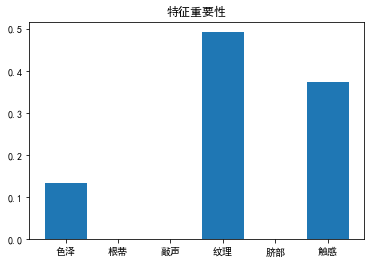

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline 
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

plt.bar(height=ent_tree.feature_importances_,x=data.columns[:-1])
plt.title("特征重要性")
plt.show() 

### 决策树可视化

In [34]:
import graphviz 
import pydotplus 
import pydot

In [41]:
dot_tree= tree.export_graphviz(ent_tree, out_file=None, 
                                #feature_names=X.columns,
                                class_names=['否', '是'],
                                filled=True, rounded=True, 
                                special_characters=True)
graph_tree = pydotplus.graph_from_dot_data(dot_tree.replace('helvetica','"Microsoft Yahei"'))

In [42]:
graph_tree.write_png("F:/大三（上）/机器学习/决策树实践作业/决策树实践作业/ent_tree.png")  # 保存图片

True

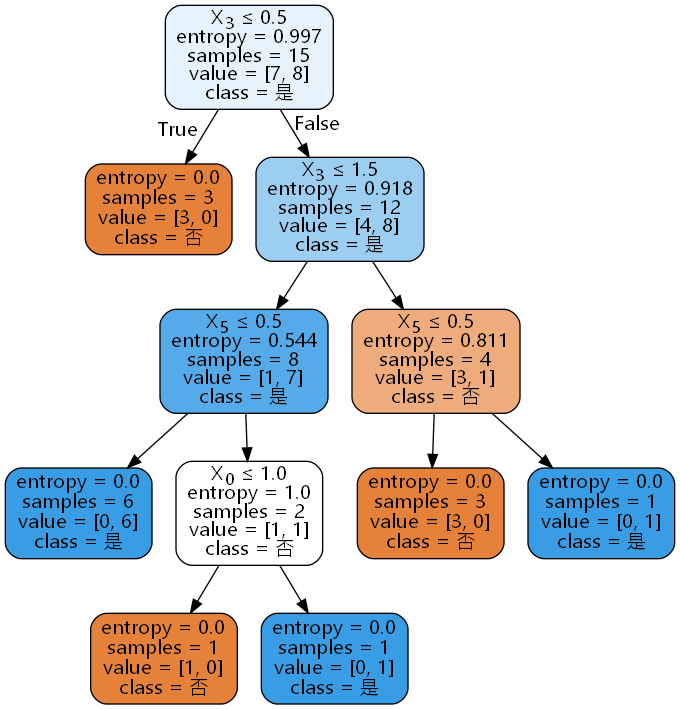

In [43]:
from IPython.display import Image
Image(graph_tree.create_png())

### 决策树(gini系数准则)及可视化

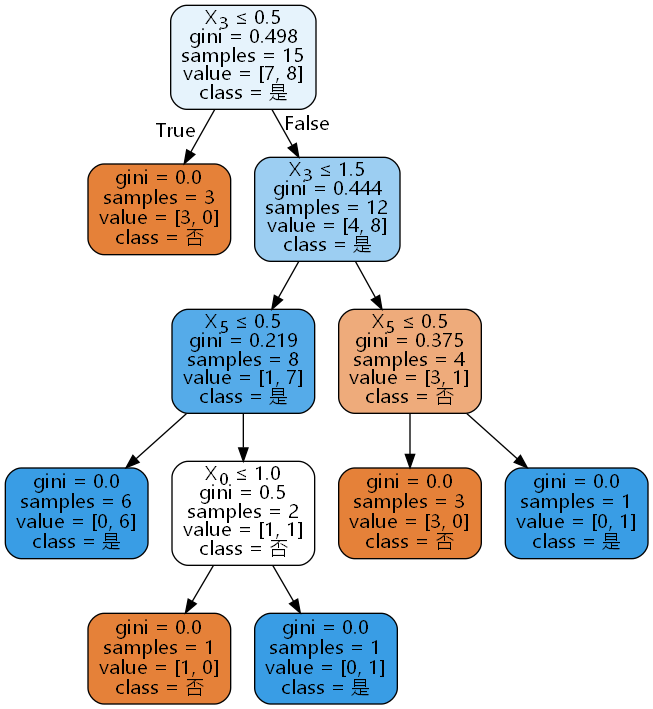

In [44]:
# min_sample_split表示划分节点的最小样本数量
# max_depth表示树的最大深度
# min_impurity_decrease表示继续划分的不纯度下降阈值
# 可以调整参数观察树形状的改变
gini_tree= tree.DecisionTreeClassifier(criterion="gini",
                                        min_samples_split=2,
                                        max_depth=5,
                                        min_impurity_decrease=0.0)
gini_tree.fit(Xtrain,Ytrain)

dot_tree= tree.export_graphviz(gini_tree, out_file=None, 
                                #feature_names=X.columns,
                                class_names=['否', '是'],
                                filled=True, rounded=True, 
                                special_characters=True)
graph_tree = pydotplus.graph_from_dot_data(dot_tree.replace('helvetica','"Microsoft Yahei"'))

from IPython.display import Image
Image(graph_tree.create_png())

In [64]:
gini_tree.score(Xtest,Ytest) #在测试集上的得分

0.0

### 交叉验证下的决策树建模的效果

In [39]:
from sklearn.model_selection import cross_val_score   #交叉验证
scores=cross_val_score(gini_tree,X,y,cv=3)

In [40]:
scores

array([0.66666667, 0.5       , 0.6       ])

In [41]:
scores.mean()

0.5888888888888889

## 3.加载波士顿房价数据集，构建房价的树回归模型，并与线性回归和KNN回归做比较

### 树回归模型 

In [128]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)

In [68]:
from sklearn import tree
from sklearn import linear_model

In [77]:
boston_house=load_boston()
boston_features_name=boston_house.feature_names
boston_features=boston_house.data
boston_taget=boston_house.target

In [80]:
#构建模型
rgs=tree.DecisionTreeRegressor(max_depth=2)
rgs=rgs.fit(boston_features,boston_taget)
print(rgs)

DecisionTreeRegressor(max_depth=2)


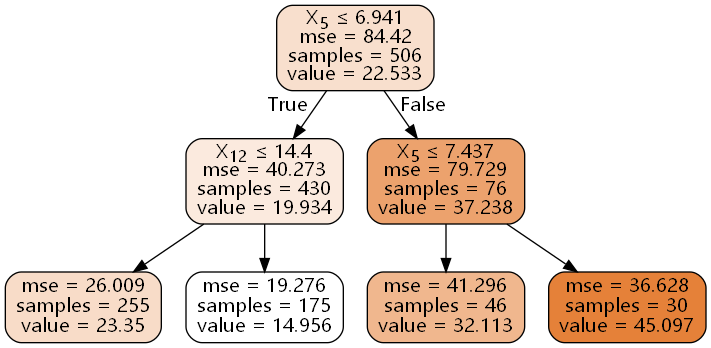

In [81]:
dot_tree= tree.export_graphviz(rgs,out_file=None, 
                                filled=True, rounded=True, 
                                special_characters=True)
graph_tree = pydotplus.graph_from_dot_data(dot_tree.replace('helvetica','"Microsoft Yahei"'))

from IPython.display import Image
Image(graph_tree.create_png())

### 线性回归

In [83]:
from sklearn import model_selection 
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.1,random_state=42)

In [84]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [85]:
X_train.shape 

(455, 13)

In [86]:
y_train.shape

(455,)

In [87]:
sc_y=StandardScaler()
y_train=sc_y.fit_transform(y_train.reshape(-1,1))
y_test=sc_y.transform(y_test.reshape(-1,1))

In [88]:
from sklearn import linear_model
sgd=linear_model.SGDRegressor(max_iter=10000, tol=0.0000001).fit(X_train,y_train)
sgd.score(X_train,y_train)

E:\Anaconda3\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.7363557544979727

In [89]:
sgd.intercept_

array([0.0004502])

In [90]:
sgd.coef_

array([-0.10529532,  0.08677713, -0.01583266,  0.07820443, -0.21609988,
        0.29467215,  0.00711405, -0.32920797,  0.20736585, -0.12893226,
       -0.2198249 ,  0.10558906, -0.41915656])

In [91]:
sgd.score(X_test,y_test)

0.7577840228373864

In [92]:
pre_y_sgd=sgd.predict(X_test)
pre_y_sgd 

array([ 0.72000038,  1.43233079, -0.80326492,  0.22686528, -0.43720567,
        0.07699432, -0.53257889, -0.96062739,  0.03963296, -0.19084865,
        0.22334046, -0.39327108, -3.00912618, -0.10068557, -0.32702301,
        0.32052691, -0.34067777, -1.78804987,  1.90369133, -0.55387788,
        0.46255458,  0.7831171 , -1.19055874,  0.12189967, -0.49685555,
       -0.69228785,  0.02394992, -0.84325209, -0.01481102, -0.33710367,
        0.04831756,  0.26695406,  0.28675686, -0.46401922, -0.63602013,
       -0.58154485,  0.89062229, -0.26895605,  0.10464143,  0.16636986,
       -0.90220384,  1.0254988 ,  2.10602108, -0.51885121,  0.52681318,
       -0.59021886, -0.88085072,  0.29468803, -0.26861717,  0.85456114,
       -0.10023975])

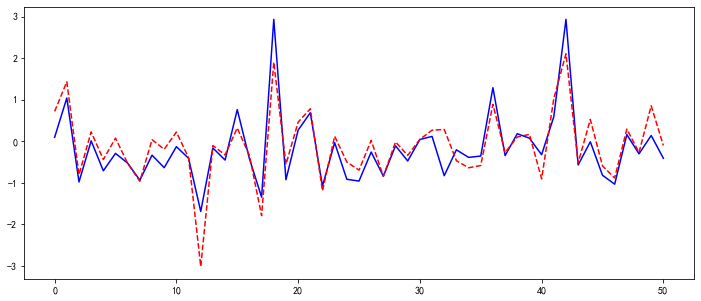

In [93]:
fig=plt.figure(figsize=(12,5))
plt.plot(range(len(y_test)),y_test,"b",label="真实值")
plt.plot(range(len(pre_y_sgd)),pre_y_sgd,"r--",label="预测值")
plt.show() 

### KNN回归

In [129]:
n_neighbors=15
weights="uniform"

In [141]:
knn_clf1=neighbors.KNeighborsClassifier(n_neighbors=n_neighbors,weights=weights)
knn_clf1.fit(X.astype('int'),y.astype('int'))

KNeighborsClassifier(n_neighbors=15, weights='distance')

In [142]:
y_pre=knn_clf1.predict(X)

In [143]:
pd.DataFrame(y,y_pre)

,0
24,24.0
21,21.6
34,34.7
33,33.4
36,36.2
...,...
22,22.4
20,20.6
23,23.9
22,22.0


In [140]:
#使用K-NN对训练集数据进行训练
from sklearn import neighbors
from sklearn import metrics 

KNN_model = neighbors.KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_model.fit(X, y.astype('int'))

KNeighborsClassifier()

In [120]:
#对测试集进行预测
y_pre=KNN_model.predict(X)

In [121]:
pd.DataFrame(y,y_pre)

,0
18,24.0
16,21.6
19,34.7
19,33.4
18,36.2
...,...
22,22.4
22,20.6
23,23.9
23,22.0


In [122]:
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1  #图的横坐标范围
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1  #图的纵坐标范围

xx,yy=np.meshgrid(np.arange(x_min,x_max,0.02),np.arange(y_min,y_max,0.02)) #网格

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors
import warnings

#jupyter notebook中为了在代码行直接显示图形
%matplotlib inline 

warnings.filterwarnings('ignore')
#plt.rcParams['font.sans-serif']=['SimHei']
#plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

In [151]:
knn_reg = neighbors.KNeighborsRegressor(n_neighbors=15,weights='distance')
knn_reg.fit(X,y)

KNeighborsRegressor(n_neighbors=15, weights='distance')

In [152]:
result=knn_reg.predict(X)

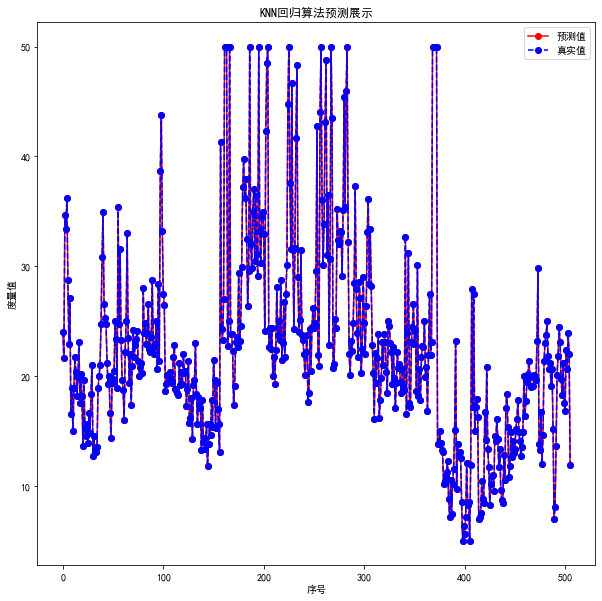

In [157]:
import seaborn as sns
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(10,10))
plt.plot(result,"ro-",label="预测值")
plt.plot(y,"bo--",label="真实值")
plt.title("KNN回归算法预测展示")
plt.xlabel("序号")
plt.ylabel("度量值")
plt.legend()
plt.show()

三个模型各有千秋，其中线性回归模型效果较差，KNN回归模型一般，树回归模型效果好。故我们将选取决策树来预测未来的波士顿房价

## 4、(选做题）利用数据增强技术，完成人脸表情数据的决策树分类模型构建，并评价其效果

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [159]:
df=pd.read_csv("F:/大三（上）/机器学习/决策树参考代码/决策树参考代码/fer2013.csv")
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [160]:
pixels = df.loc[:,'pixels'].values

print(pixels.shape)
print(type(pixels))

(35887,)
<class 'numpy.ndarray'>


In [161]:
px = []
for x in pixels : 
    x = x.split(" ")
    x = [float(t) for t in x]
    px.append(x)

In [162]:
x = np.array(px)
print(x.shape)

(35887, 2304)


In [163]:
y = df.loc[:, 'emotion'].values
print(y.shape)
print(type(y))

(35887,)
<class 'numpy.ndarray'>


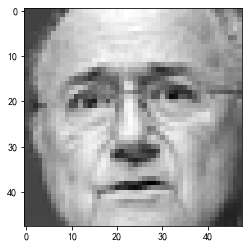

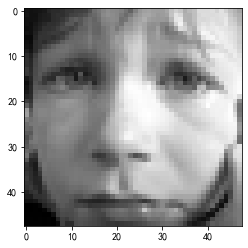

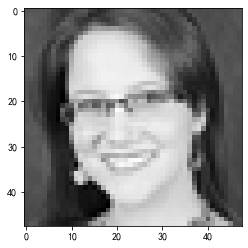

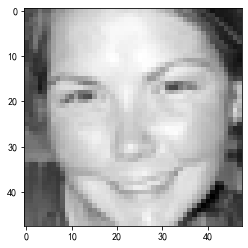

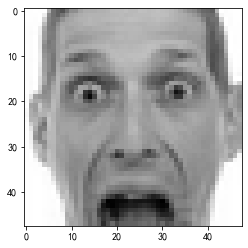

In [164]:
for ix in range(5,10):
    plt.figure(ix)
    plt.imshow(x[ix].reshape((48, 48)), interpolation='none', cmap='gray')
    plt.show()

In [165]:
from sklearn import tree

In [166]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 

In [167]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size=0.3)

In [168]:
clf=tree.DecisionTreeClassifier(random_state=25)
clf=clf.fit(Xtrain, Ytrain)

In [169]:
score_ = clf.score(Xtest, Ytest)
score_ 

0.31029999071236186

### 数据增强

In [170]:
import Augmentor

In [171]:
#指定图片所在目录
p = Augmentor.Pipeline("F:/大三（上）/机器学习/决策树实践作业/决策树实践作业/表情图/")

Initialised with 35887 image(s) found.
Output directory set to F:/大三（上）/机器学习/决策树实践作业/决策树实践作业/表情图/output.

In [172]:
# 增强操作
# 旋转 概率0.3，向左最大旋转角度10，向右最大旋转角度10
p.rotate(probability=0.3,max_left_rotation=10, max_right_rotation=10)

#水平翻转
p.flip_left_right(probability=0.4)

#垂直翻转
p.flip_top_bottom(probability=0.1)

#裁剪
p.crop_by_size(probability=0.1,width=48,height=48)

In [173]:
# 指定增强后图片数目总量
p.sample(100000)

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=48x48 at 0x251DD446A08>: 100%|█| 100000/100000 [10:21
